# scikit-learnを使ってスパムメールを分類

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import draw_function

In [3]:
#%ls

In [4]:
spam=pd.read_csv('SpamData.csv')
spam.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type,Unnamed: 58
0,1,-0.342396,0.330849,0.712781,-0.046894,0.011563,-0.350228,-0.291762,-0.262533,-0.323267,...,-0.158436,-0.514251,-0.155181,0.623939,-0.308321,-0.103037,-0.045242,0.045293,-0.008723,1
1,2,0.345322,0.051904,0.435082,-0.046894,-0.256089,0.672326,0.244717,-0.088001,-0.323267,...,-0.158436,-0.026004,-0.155181,0.126189,0.423737,0.008762,-0.002443,0.250536,1.228191,1
2,3,-0.145906,-0.165054,0.851631,-0.046894,1.364698,0.343648,0.193623,0.036666,1.973802,...,-0.117364,0.014683,-0.155181,0.008495,0.440005,-0.079746,0.145905,2.220865,3.258378,1
3,4,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,...,-0.158436,-0.007510,-0.155181,-0.161917,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1
4,5,-0.342396,-0.165054,-0.556700,-0.046894,0.472521,-0.350228,0.500183,1.308259,0.789376,...,-0.158436,-0.014908,-0.155181,-0.164369,-0.308321,-0.103037,-0.052144,-0.062459,-0.152205,1


### データをトレーニングデータとテストデータに分ける

In [5]:
from sklearn. model_selection import train_test_split


#0~58列目以降のデータをXに、最後の列のデータをyに格納
X,y=spam.iloc[:,0:-1],spam.iloc[:,-1]

#トレーニングデータとテストデータに分割
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

# アンサンブル学習

 - 弱い学習器
 　-- ロジスティック回帰
　 -- 決定木
 　--k近傍法　

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA




clf1 = LogisticRegression(random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')


MV=VotingClassifier(estimators=[('lr',clf1),('tr',clf2),('kn',clf3)],voting='soft')



pipe1 = Pipeline([['sc', StandardScaler()],
                  ['pca',PCA(n_components=2)],
                  ['clf1', clf1]])

pipe2=Pipeline([['sc',StandardScaler()],
                ['pca',PCA(n_components=2)],
                ['clf2',clf2]])

pipe3 = Pipeline([['sc', StandardScaler()],
                  ['pca',PCA(n_components=2)],
                  ['clf3', clf3]])


pip_mv=Pipeline([['sc', StandardScaler()],['pca',PCA(n_components=2)],['mv', MV]])

clf_labels = ['Logistic Regression', 'Decision Tree', 'KNN','Majority Voting']
all_clf = [pipe1, pipe2, pipe3, pip_mv]


print('10-fold cross validation:\n')
for clf, label in zip(all_clf, clf_labels):
    scores = cross_val_score(estimator=clf,
                             X=X_train,
                             y=y_train,
                             cv=10,
                             scoring='accuracy')
    print("accuracy: %f (+/- %f) [%s]"
          % (scores.mean(), scores.std(), label))
    

    

10-fold cross validation:

accuracy: 0.919866 (+/- 0.014830) [Logistic Regression]
accuracy: 0.899992 (+/- 0.018886) [Decision Tree]
accuracy: 0.893476 (+/- 0.013616) [KNN]
accuracy: 0.914595 (+/- 0.016720) [Majority Voting]


### グリッドサーチによるパラメータ調整　

In [7]:
from sklearn.model_selection import GridSearchCV

params=[{'tr__max_depth':[1,2,3],'lr__C':[0.01,0.1,10],'lr__penalty':['l2']},
        {'tr__max_depth':[1,2,3],'lr__C':[0.01,0.1,10],'lr__penalty':['l1']}  
       ]
grid=GridSearchCV(estimator=MV,
                  param_grid=params,
                  cv=10,
                  scoring='accuracy')

In [8]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start...       weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'tr__max_depth': [1, 2, 3], 'lr__C': [0.01, 0.1, 10], 'lr__penalty': ['l2']}, {'tr__max_depth': [1, 2, 3], 'lr__C': [0.01, 0.1, 10], 'lr__penalty': ['l1']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

### パラメータを見てみる

In [9]:
grid.best_params_

{'lr__C': 0.01, 'lr__penalty': 'l2', 'tr__max_depth': 1}

In [10]:
##トレーニングデータに対してのベストスコア
grid.best_score_

0.99968944099378887

### ベストのパラメータでテストデータを検証

In [11]:
best_clf=grid.best_estimator_
best_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('tr', DecisionT...owski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [12]:
best_clf.score(X_test,y_test)

0.999275887038378

### 学習曲線を使ってバイアスとバリアンスの検証

In [13]:
from sklearn.model_selection import learning_curve



train_sizes,train_scores,test_scores=\
                learning_curve(estimator=best_clf,
                              X=X_train,
                              y=y_train,
                              train_sizes=np.linspace(0.1,1.0,10),
                              cv=10,
                              n_jobs=1)

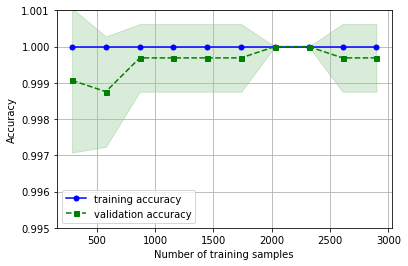

In [14]:
train_mean=np.mean(train_scores,axis=1)
train_std=np.std(train_scores,axis=1)

test_mean=np.mean(test_scores,axis=1)
test_std=np.std(test_scores,axis=1)

#プロット

#トレーニングデータ
plt.plot(train_sizes,train_mean,color='blue',marker='o',
                             markersize=5,label='training accuracy')

plt.fill_between(train_sizes,
                 train_mean+train_std,
                 train_mean-train_std,
                 alpha=0.15,
                 color='blue')

#テストデータ
plt.plot(train_sizes,test_mean,color='green',linestyle='--',marker='s',
                             markersize=5,label='validation accuracy')

plt.fill_between(train_sizes,
                 test_mean+test_std,
                 test_mean-test_std,
                 alpha=0.15,
                 color='green')


plt.grid()

plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')

plt.legend(loc='best')
plt.ylim([0.995,1.001])

plt.show()

### トレーニングデータのサンプル数が少ないと過学習がみられるが正答率をみる限り問題はないだろう.


## 最後にどんな分布になってるか確認してみよう

### スパムメールのデータをPCAで二次元に変換

In [15]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


#平均と標準偏差を用いて標準化
sc=StandardScaler()

X_train_std=sc.fit_transform(X_train)
X_test_std=sc.transform(X_test)

#主成分数を指定して、PCAのインスタンスを生成
pca=PCA(n_components=2)

#トレーニングデータとテストデータをPCAに適合させる
X_train_pca=pca.fit_transform(X_train_std)
X_test_pca=pca.transform(X_test_std)

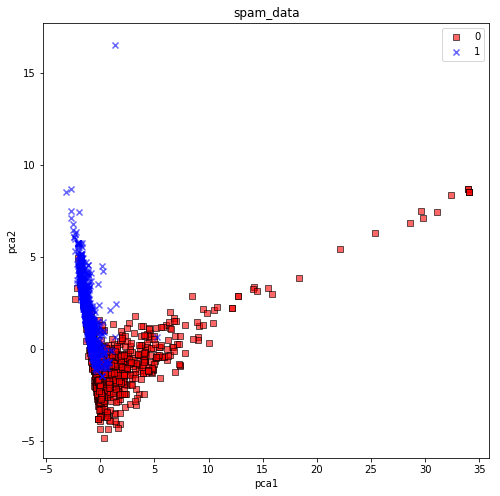

In [16]:
draw_function.plot_decision_regions(X_train_pca,y_train,x_label='pca1',y_label='pca2',title='spam_data')

#### トレーニングデータの決定領域をみてみる

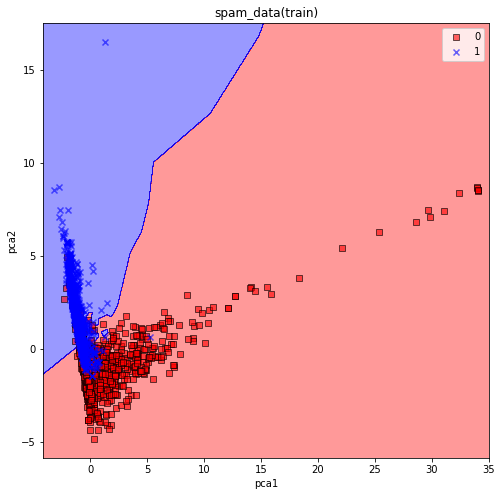

In [17]:
clf1 = LogisticRegression(C=0.01,penalty='l2',random_state=0)

clf2 = DecisionTreeClassifier(max_depth=1,
                              criterion='entropy',
                              random_state=0)

clf3 = KNeighborsClassifier(n_neighbors=1,
                            p=2,
                            metric='minkowski')


MV=VotingClassifier(estimators=[('lr',clf1),('tr',clf2),('kn',clf3)],voting='soft')
MV.fit(X_train_pca,y_train)

draw_function.plot_decision_regions(X_train_pca,y_train,classifier=MV,x_label='pca1',y_label='pca2',title='spam_data(train)')

#### 　テストデータの決定領域をみてみる

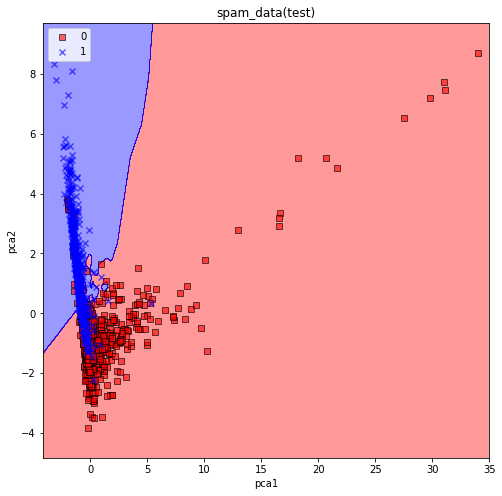

In [18]:
draw_function.plot_decision_regions(X_test_pca,y_test,classifier=MV,x_label='pca1',y_label='pca2',title='spam_data(test)')

#### しっかり分類できているか謎である、、

## end